# Image Compression with K-Means Clustering

The purpose of this project is to create an algorithm that can be useful to compress an image with the help of k-means clustering method. 

The image that will be compressed can be any size and we can also choose by how many colors the image will be represented. The less the colors to represent the image, the lower the memory needed for the storage device to store the image.

In this project, the image will be represented by the top 15 of most dominant colors in each image. The top 15 most dominant colors can be found by k-means clustering algorithm. So let's get started. 

First, let's import the libraries and the image that we are going to use in this project.

(-0.5, 619.5, 386.5, -0.5)

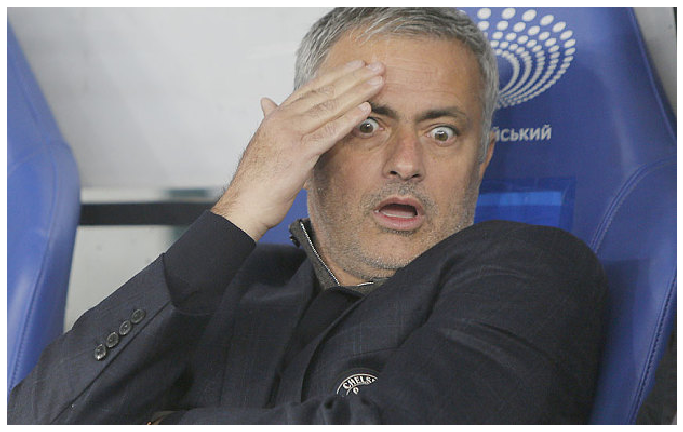

In [36]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('jose.jpg')
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.axis('off')

Alright now we have the picture of Jose Mourinho. Next, let's check the 3D matrix of this image.

In [37]:
print(image[0][0:5])
print(np.shape(image))

[[166 165 170]
 [167 166 172]
 [167 166 174]
 [166 164 175]
 [168 166 177]]
(387, 620, 3)


As we can see above, the image has 387 x 620 pixels with the last index represents the RGB colors of the image. First, let's normalize the RGB pf the image so that the value will alwas be in between 0-1.

In [38]:
if image[0,0,0] > 1:
    image = image/255
else:
    image
    
image[0][0:5]

array([[0.65098039, 0.64705882, 0.66666667],
       [0.65490196, 0.65098039, 0.6745098 ],
       [0.65490196, 0.65098039, 0.68235294],
       [0.65098039, 0.64313725, 0.68627451],
       [0.65882353, 0.65098039, 0.69411765]])

After normalizing the RGB value of the image, let's store the shape of the image into new variable called `imageSize`

In [39]:
imageSize = np.shape(image)

Next, we need to initialize our X data, which is the data that will be used for k-means clustering. In order to do this, we need to reshape the image size into $N x 3$, where $N$ is the total number of pixels.

In [40]:
xData = image.reshape(imageSize[0]*imageSize[1],3)

Then, let's define the parameters that we will need to run the k-means simulations, which is the number of colors that we choose to represent the image $K$, which in this project will be 15, and maximum number of iterations for k-means algorithm.

In [41]:
K= 15
maxIterations = 10

## Centroid Initializations

Before we run any k-means algorithm, it is particularly important to initialize the centroids randomly. In this project, the centroids will be randomly assigned to the exact location of the random data points in the $X$ data. So, let's create a function to do this. 

In [42]:
def initializeCentroids (numOfCentroids, xData):
    
    centroids = np.zeros((numOfCentroids, len(xData[1])))
    
    idx = np.random.permutation(len(xData))
    
    centroids = xData[idx[0:K],:]
    
    return centroids

Now let's call the function above and assign the result into variable called `initialCentroids`.

In [43]:
initialCentroids = initializeCentroids(K, xData)

## K-Means Clustering

In this section, the algorithm to run k-means clustering will be built. In K-Means clustering, there are two steps that should be performed. These two steps are:

- Assigning each of the training data $x^{(i)}$ into its closest centroid.
- Shifting the mean of each centroid based on the location of training data points that are attached to it.

Then the algorithm will repeat again until the maximum number of iterations is reached. So first, let's create a function to assign each of the training data to its closest centroid.

In [44]:
def findClosestCentroids (x, centroids):
    
    centroidMatrices = np.zeros((len(x), len(centroids)))
    
    for i in range (len(x)):
        
        for j in range (len(centroids)):
            
            #calculate the least square error of each data points wrt initial centroids
            
            centroidMatrices[i,j]=np.sum((x[i]-centroids[j])**2)
        
     # Store the index of centroid each datapoints is assigned to
     
    index = np.argmin(centroidMatrices,1)
    
    return index

After we define a function to assign each training point to its closest centroid, now let's define another function to do the second step of k-means clustering algorithm, which is to shift the mean of each centroid based on the location of training data points that are attached to it.

In [45]:
def computeCentroids (xData, idx, numCentroids, initialCentroids):
    
    newCentroids = np.zeros((numCentroids,len(initialCentroids[0])))
    
    for i in range (numCentroids):
        
        indices = np.where(idx == i)
        
        newCentroids[i,:] = np.mean(xData[indices],0)
        
    return newCentroids

Finally, let's create a function to wrap all of the two steps of k-means clustering above in one go. This function will be executed depending on the number of iterations that we have defined above in the variable called `maxIterations`.

In [46]:
def runKMeans (xData, initialCentroids, maxIterations):
    
    numCentroids = len(initialCentroids)
    
    for i in range (maxIterations):
        
        # Find the closest centroids of each data points
        
        idx = findClosestCentroids(xData, initialCentroids)
        
        # compute the new mean of each centroid
        
        newCentroids = computeCentroids(xData, idx, numCentroids, initialCentroids)
        
    return newCentroids

After we define all of the necessary function to run k-means clustering algorithm, let's call the `runKMeans` function above in order to get the final 15 most dominant colors in our image. These 15 most dominant colors will be represented by the final centroids location after running all the iterations.

In [47]:
finalCentroids = runKMeans(xData, initialCentroids, maxIterations)

In [48]:
finalCentroids[0:5]

array([[0.62342284, 0.62738532, 0.63881793],
       [0.16943331, 0.20883477, 0.33810827],
       [0.12057827, 0.12831427, 0.1239567 ],
       [0.26187098, 0.27112217, 0.30093582],
       [0.20397715, 0.24723433, 0.41029924]])

From the steps above, we finally get the top 15 of most dominant colors in the image. With these values, now we can assign each pixel in the original picture into these 15 RGB values. The benefit of this step is that now the compresed image will have much less number of bits compared to the original image.

So, now let's assign each pixel of the original image into these top 15 most dominant colors in the image. 

In [49]:
idx = findClosestCentroids(xData, finalCentroids)

Next, we can finally replace each of the pixel in the original image only with the mean of centroids assigned to it. So, let's map each of the pixel to the mean of the centroid it assigned to and let's call the variable `xCompressed`.

In [50]:
xCompressed = finalCentroids[idx]

And we almost done here. The final step would be reshaping the variable `xCompressed` back to its original shape, which is $N1 x N2 x 3$, where $N1$ is the pixel in the length direction and $N2$ is the pixel in the width direction. Let's do this. 

In [51]:
xCompressed = xCompressed.reshape(imageSize[0],imageSize[1],3)
print(np.shape(xCompressed))

(387, 620, 3)


As we can see above, now we have the shape of `xCompressed` the same as the original image. Now we can visualize the result of the compression of the image and compare it side-by-side with the original image.

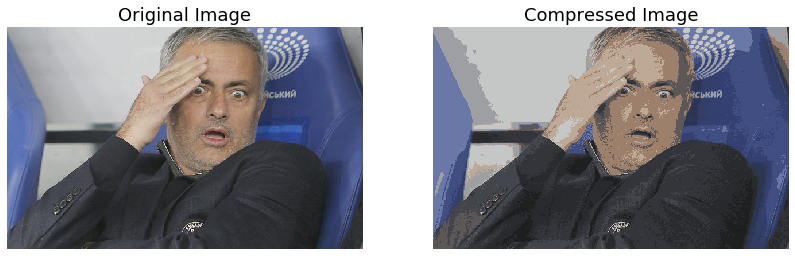

In [52]:
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
plt.title('Original Image',fontsize=18)
plt.imshow(image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Compressed Image',fontsize=18)
plt.imshow(xCompressed)
plt.axis('off')
plt.savefig('Compression.jpg', format='jpg', dpi=720)
plt.show()

And there we have it! The compressed image of Jose Mourinho using k-means clustering algorithm. We can see that there is an artifact of compression eventhough the compressed image retains the characteristics of the original image. However, the compressed image requires much less number of bits and in some strange way, more artsy.